# ECUACIONES DIFERENCIALES PARCIALES I  
## Alejandro Felipe Aviles - 5MV1 - 16/01/2023  
**Aclaración**: El primer programa está escrito en Python y el segundo en Octave debido a que para el segundo, Python no logró graficar correctamente la gráfica en 3D y ya no tenía tiempo para arreglar ese código

### Problema 2

La solución de la ecuación

$$\dfrac{\partial  u }{\partial t}= \dfrac{\partial^2  u }{\partial x^2}$$

sujeta a las siguientes condiciones de frontera

$$\dfrac{\partial u(0,t) }{\partial t}=\dfrac{\partial  u(1,t) }{\partial t}=0$$

y a las condiciones iniciales:

$$u(x,0)=f(x)$$

Donde

$$f(x)= \left\{ \begin{array}{lcc}
             -2 &   \text{si}  &  0 < x < \frac{1}{2} \ \\
             \\ 0 &  \text{si}  & \frac{1}{2} < x < 1 
             \end{array}
   \right.$$

Está dada en términos de la serie de Fourier por la expresión:

$$
u(x,t)=-1+\sum_{n=1}^{\infty}\dfrac{-4\sin{\left( \dfrac{n\pi}{2}  \right)   }}{n\pi}\cos{(n\pi x)\,e^{(-n^2 \pi^2t)}}
$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$

Para empezar, graficamos la condición inicial.

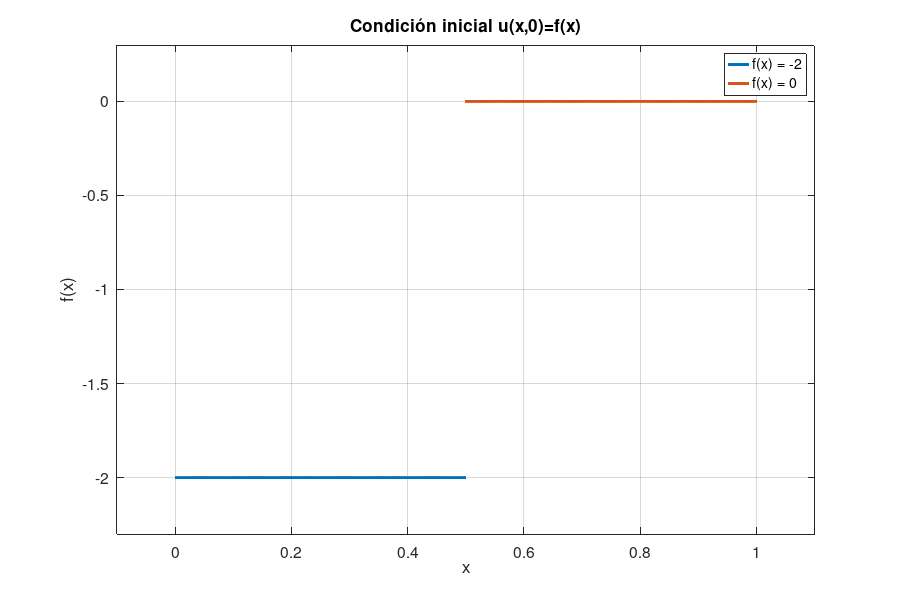

In [1]:
figure('position', [0, 0, 900, 600]);
x1 = linspace(0, 0.5, 100);
x2 = linspace(0.5, 1, 100);

y1 = -2*ones(1,length(x1));
y2 = zeros(1,length(x2));

plot(x1, y1, '-', 'linewidth', 3, 'displayname', 'f(x) = -2');
hold on;
plot(x2, y2, '-', 'linewidth', 3, 'displayname', 'f(x) = 0');
set(gca, 'GridColor', 'k')
grid on;
legend('show');
xlabel('x');
ylabel('f(x)');
title("Condición inicial u(x,0)=f(x)");
xlim([-0.1 1.1]);
ylim([-2.3 0.3]);

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)$

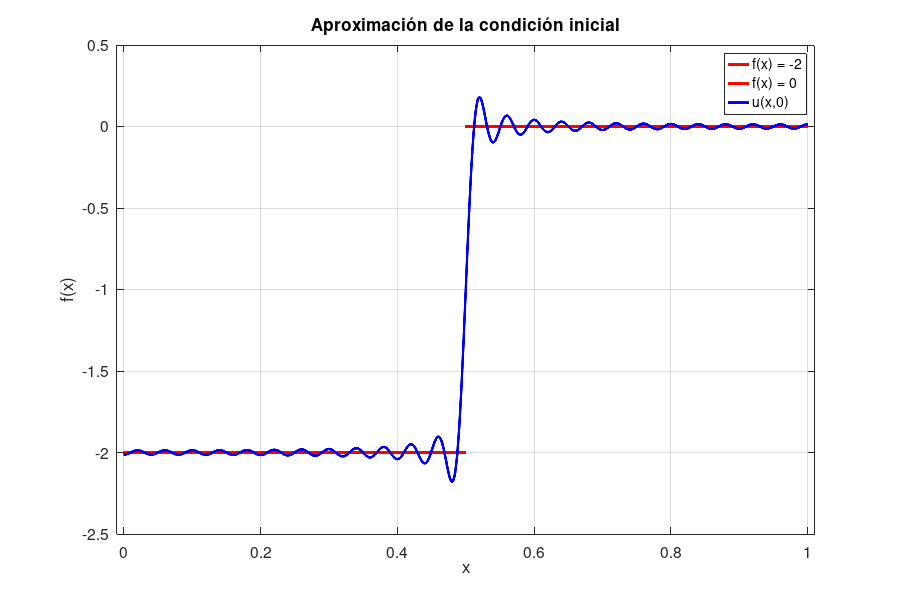

In [12]:
figure('position', [0, 0, 900, 600]);
function U = u_0(x,N=50)
    f = -1*ones(1,length(x));
    for n = 1:N
        f += (-4*sin((n*pi)/2))/(n*pi)*cos(n*pi*x);
    endfor
    U = f;
endfunction

x1 = linspace(0, 0.5, 100);
x2 = linspace(0.5, 1, 100);

y1 = -2*ones(1,length(x1));
y2 = zeros(1,length(x2));

plot(x1, y1, '-r', 'linewidth', 3, 'displayname', 'f(x) = -2');
hold on;
plot(x2, y2, '-r', 'linewidth', 3, 'displayname', 'f(x) = 0');

x = linspace(0,1,1000);
U = u_0(x);
plot(x,U, '-b','linewidth', 3,'displayname', 'u(x,0)');
xlabel('x');
ylabel('f(x)');
title("Aproximación de la condición inicial")
xlim([-0.01,1.01])
ylim([-2.5,0.5])
grid on;
legend('show');

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

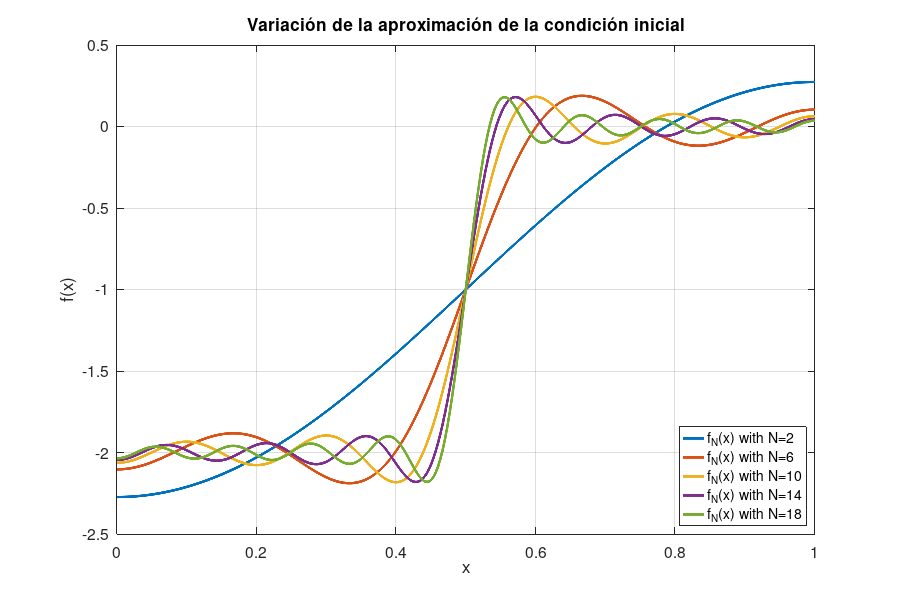

In [10]:
figure('position', [0, 0, 900, 600]);
for i = 2:4:20
    plot(x,u_0(x,i), 'linewidth',3,'displayname', sprintf('f_N(x) with N=%d',i))
    xlabel('x');
    ylabel('f(x)');
    title("Variación de la aproximación de la condición inicial")
    xlim([0,1.])
    ylim([-2.5,0.5])
    hold on;
endfor
grid on;
legend('location','southEast');


Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial $t=0$

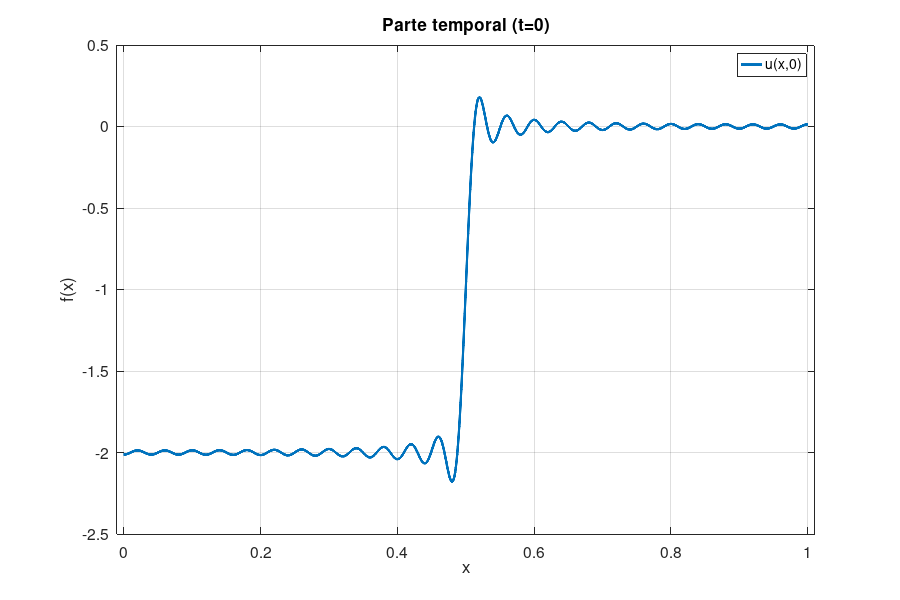

In [11]:
figure('position', [0, 0, 900, 600]);
function U = u_0(x,t,N=50)
    f = -1*ones(1,length(x));
    for n = 1:N
        f += (-4*sin((n*pi)/2))/(n*pi)*cos(n*pi*x)*exp(-n^2*pi*t);
    endfor
    U = f;
endfunction

x = linspace(0,1,1000);
t = 0;

for i = 1:length(t)
    U = u_0(x,t(i));
    plot(x,U, '-', 'linewidth',3, 'displayname', 'u(x,0)')
    xlabel('x');
    ylabel('f(x)');
    title("Parte temporal (t=0)")
    xlim([-0.01,1.01])
    ylim([-2.5,0.5])
    grid on;
    hold on;
endfor
legend('show');

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$

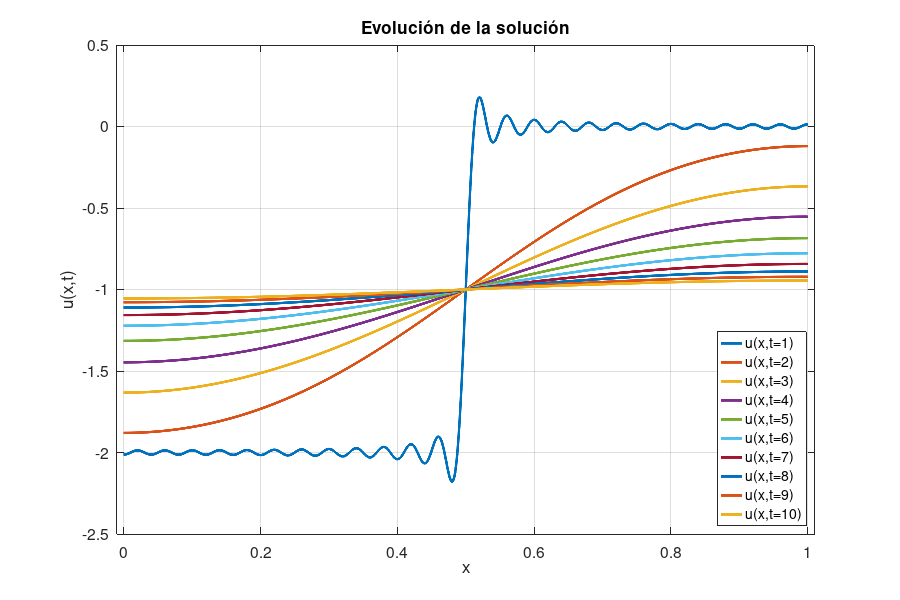

In [5]:
figure('position', [0, 0, 900, 600]);
function U = u_0(x,t,N=50)
    f = -1*ones(1,length(x));
    for n = 1:N
        f += (-4*sin((n*pi)/2))/(n*pi)*cos(n*pi*x)*exp(-n^2*pi*t);
    endfor
    U = f;
endfunction

x = linspace(0,1,1000);
t = linspace(0,1,10);

for i = 1:length(t)
    U = u_0(x,t(i));
    plot(x,U, '-', 'linewidth',3, 'displayname', sprintf('u(x,t=%d)',i))
    xlabel('x');
    ylabel('u(x,t)');
    title("Evolución de la solución")
    xlim([-0.01,1.01])
    ylim([-2.5,0.5])
    grid on;
    hold on;
   legend('location','southEast');
endfor

Y podemos ver esto en una gráfica en 3D.

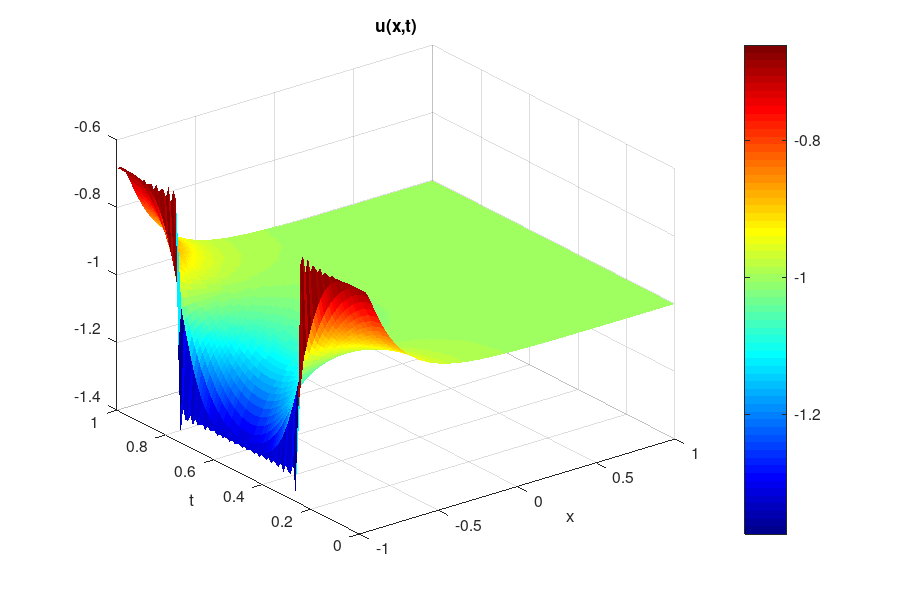

In [6]:
figure('position', [0, 0, 900, 600]);
x = linspace(-1, 1, 100);
t = linspace(0, 1, 100);
z = zeros(length(x), length(t));

for i = 1:length(x)
  for j = 1:length(t)
    for n = 1:40
    z(i,j) = z(i,j) -(4*sin((n*pi)/2)*exp(-n^2*pi^2*t(j))*cos(n*pi*x(i)))/(n*pi);
    end
  end
end

z = z/pi - 1;
surf(x,t,z)
colormap(gca,jet);
shading flat;
colorbar;
xlabel('x');
ylabel('t');
title("u(x,t)")b

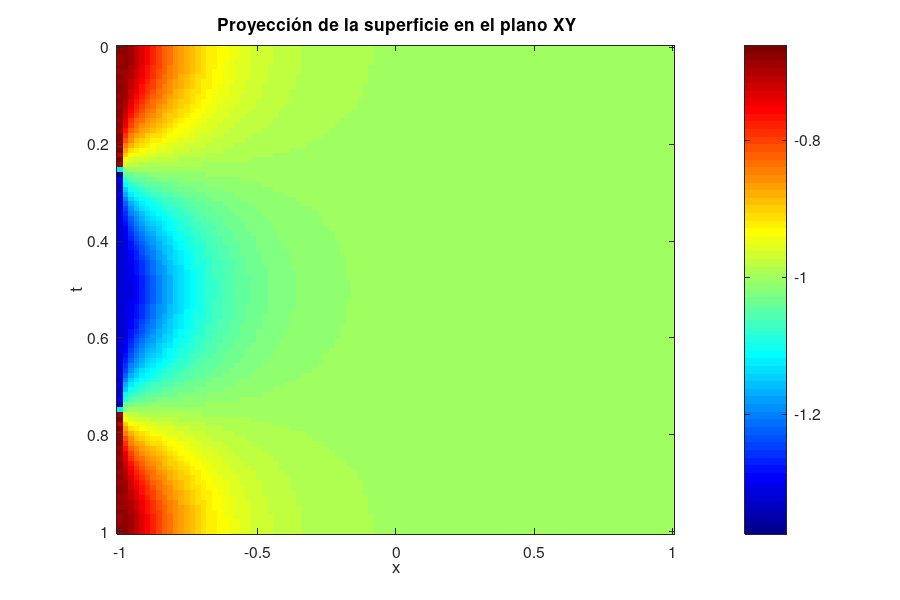

In [7]:
figure('position', [0, 0, 900, 600]);
x = linspace(-1, 1, 100);
t = linspace(0, 1, 100);
z = zeros(length(x), length(t));

for i = 1:length(x)
  for j = 1:length(t)
    for n = 1:40
    z(i,j) = z(i,j) -(4*sin((n*pi)/2)*exp(-n^2*pi^2*t(j))*cos(n*pi*x(i)))/(n*pi);
    end
  end
end

z = z/pi - 1;
imagesc(x, t, z)
colormap(gca,jet);
colorbar;
xlabel('x');
ylabel('t');
zlabel('f(x,t)');
title("Proyección de la superficie en el plano XY")